In [25]:
import json
import os
import re

# Data

In [26]:
DATA_DIR = '../job-descriptions/'
OUTPUT_DIR = '../software-jobs/'

In [27]:
files = os.listdir(DATA_DIR)
print("Number of files: ", len(files))

Number of files:  17180


## Cleaning

In [28]:
job_descriptions = []
for file in files:
    with open(DATA_DIR + file, 'r') as f:
        data = json.load(f)
        data['content'] = re.sub(r'\n+', '\n', data['content'])  # remove multiple newlines
        data['content'] = re.sub(r'\t+', '\t', data['content'])  # remove multiple tabs
        data['content'] = re.sub(r'\r+', '\r', data['content'])  # remove multiple carriage returns
        data['content'] = re.sub(r'\r\n+', '\r\n', data['content'])  # remove multiple carriage returns
        data['content'] = re.sub(r'\n\r+', '\n\r', data['content'])  # remove multiple carriage returns
        data['file'] = file
        job_descriptions.append(data)

# EDA

In [29]:
job_titles = [job['title'] for job in job_descriptions]

In [30]:
# split job titles into words
job_titles_words = []
for title in job_titles:
    job_titles_words.extend(title.split(' '))

In [31]:
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [32]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(job_titles_words))

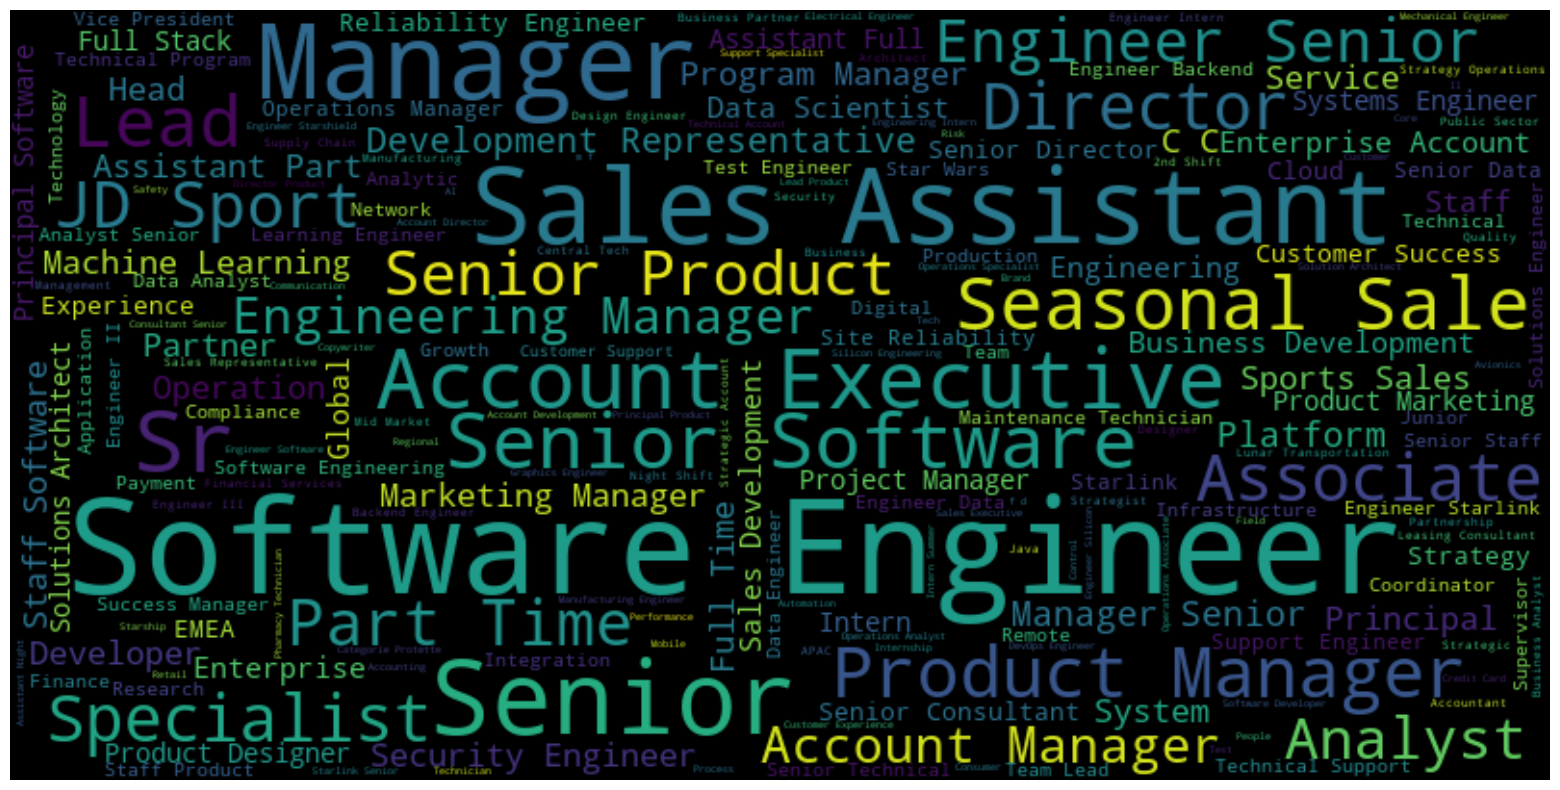

In [33]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
# most common words
from collections import Counter

In [35]:
Counter(job_titles_words).most_common(50)

[('-', 4506),
 ('Engineer', 3204),
 ('Senior', 2952),
 ('Manager', 1983),
 ('', 1959),
 ('Software', 1746),
 ('Sales', 1526),
 ('Product', 997),
 ('Assistant', 980),
 ('Manager,', 975),
 ('&', 931),
 ('Account', 930),
 ('Engineer,', 905),
 ('Data', 738),
 ('Operations', 691),
 ('Analyst', 624),
 ('Lead', 619),
 ('Sr.', 586),
 ('Engineering', 581),
 ('Specialist', 554),
 ('Executive', 533),
 ('Technical', 530),
 ('Staff', 518),
 ('Development', 514),
 ('and', 512),
 ('Business', 485),
 ('Marketing', 458),
 ('of', 436),
 ('Seasonal', 435),
 ('Associate', 401),
 ('Security', 399),
 ('Principal', 389),
 ('Systems', 370),
 ('Director', 350),
 ('Customer', 350),
 ('Support', 345),
 ('Director,', 344),
 ('Technician', 325),
 ('Representative', 317),
 ('Sports', 313),
 ('Developer', 313),
 ('JD', 310),
 ('Time', 297),
 ('Intern', 294),
 ('Consultant', 291),
 ('Enterprise', 290),
 ('Program', 285),
 ('Solutions', 281),
 ('Services', 278),
 ('Designer', 270)]

In [37]:
software_job_titles = ['software', 'data', 'engineer', 'full stack']
software_jobs_count = 0
for job in job_descriptions:
    if any(word in job['title'].lower() for word in software_job_titles):
        software_jobs_count += 1
        with open(OUTPUT_DIR + job['file'], 'w') as f:
            json.dump(job, f)
print("Number of software jobs: ", software_jobs_count)

Number of software jobs:  5407
